# Statystyka matematyczna - ćwiczenia laboratoryjne

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 43
Członkowie: Robert Skulik 428339; Kacper Potaczała 425724; Maja Piątek 427763;

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

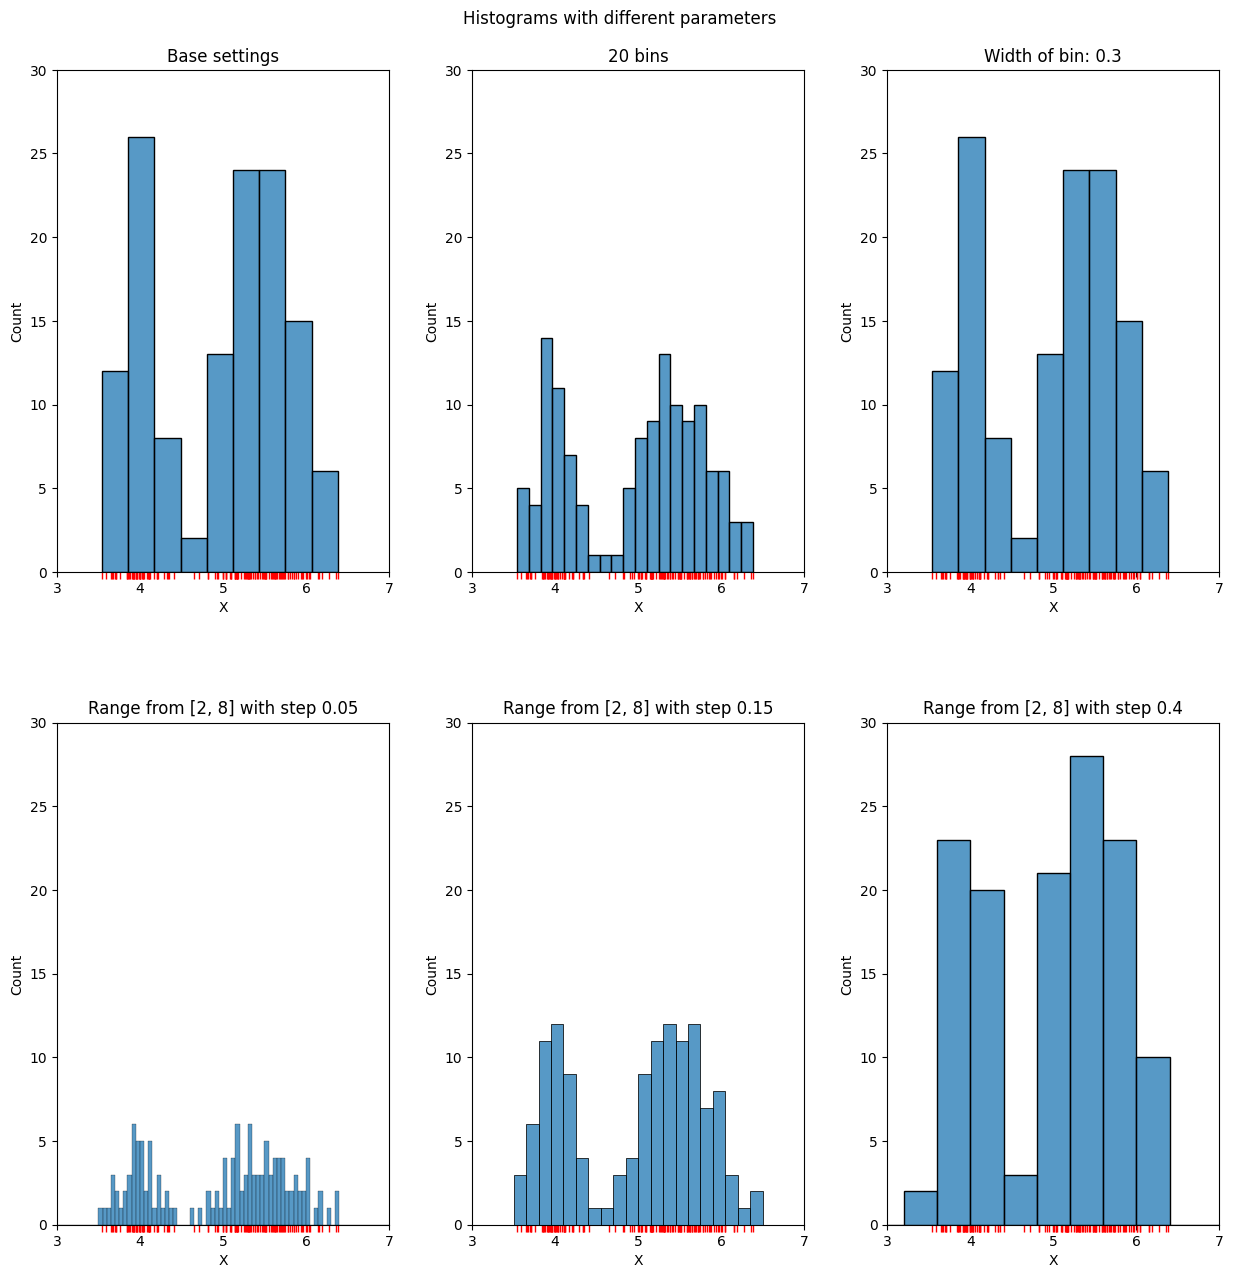

In [4]:
fig, ax1 = plt.subplots( figsize = (15,15), nrows = 2, ncols = 3)
fig.suptitle("Histograms with different parameters", y = 0.92)
plt.subplots_adjust(wspace=0.25,hspace=0.3)

sns.histplot(x = "X", data = sample, ax = ax1[0,0], legend = False )
ax1[0,0].set_title("Base settings")

sns.histplot(x = "X", data = sample, ax = ax1[0,1], bins = 20, legend = False )
ax1[0,1].set_title("20 bins")

sns.histplot(x = "X", data = sample, ax = ax1[0,2], binwidth = 0.3, legend = False )
ax1[0,2].set_title("Width of bin: 0.3")

sns.histplot(x = "X", data = sample, ax = ax1[1,0], bins=np.arange(2,8.04,0.05), legend = False )
ax1[1,0].set_title("Range from [2, 8] with step 0.05")

sns.histplot(x = "X", data = sample, ax = ax1[1,1], bins=np.arange(2,8.04,0.15), legend = False )
ax1[1,1].set_title("Range from [2, 8] with step 0.15")

sns.histplot(x = "X", data = sample, ax = ax1[1,2], bins=np.arange(2,8.04,0.4), legend = False )
ax1[1,2].set_title("Range from [2, 8] with step 0.4")

for i in range(6):
    ax1[i//3, i % 3].set_xlim(3, 7)
    ax1[i//3, i % 3].set_ylim(0, 30)
    sns.rugplot( x = "X", height=-.015, clip_on = False, color = "red", data = sample, ax = ax1[i//3, i % 3], expand_margins = True, legend = False)

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [5]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    pdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    x_min, x_max = ( data["X"].min() - 3 * sigma, data["X"].max() + 3 * sigma)
    x_values = np.linspace(x_min, x_max, estimation_points)
    
    f_values = []
    for i in x_values:
        f_values.append(np.sum(sp.stats.norm.pdf(data["X"], loc = i, scale = sigma)) )

    f_values = np.array(f_values)
    f_values = f_values / ( np.sum( f_values * (x_values[1] - x_values[0]) ) )
    
    pdf = pd.DataFrame( zip(x_values,f_values), columns = ["X", "KDE"] )

    fig2, ax2 = plt.subplots( figsize = (10,10), ncols = 1, nrows = 1 )

    ax_line = sns.lineplot(pdf, x = "X", y = "KDE", ax = ax2)
    ax2.fill_between(pdf["X"], pdf["KDE"], 0, alpha = 0.2)
    sns.rugplot( x = "X", height=-0.012, clip_on=False, color = "red", data = sample, ax = ax2, legend = False)
    
    ax2.set_title(f"Kernel density estimator with estimation_points: {estimation_points} and sigma: {sigma}")
    ax2.set_ylabel("KDE")
    
    return pdf

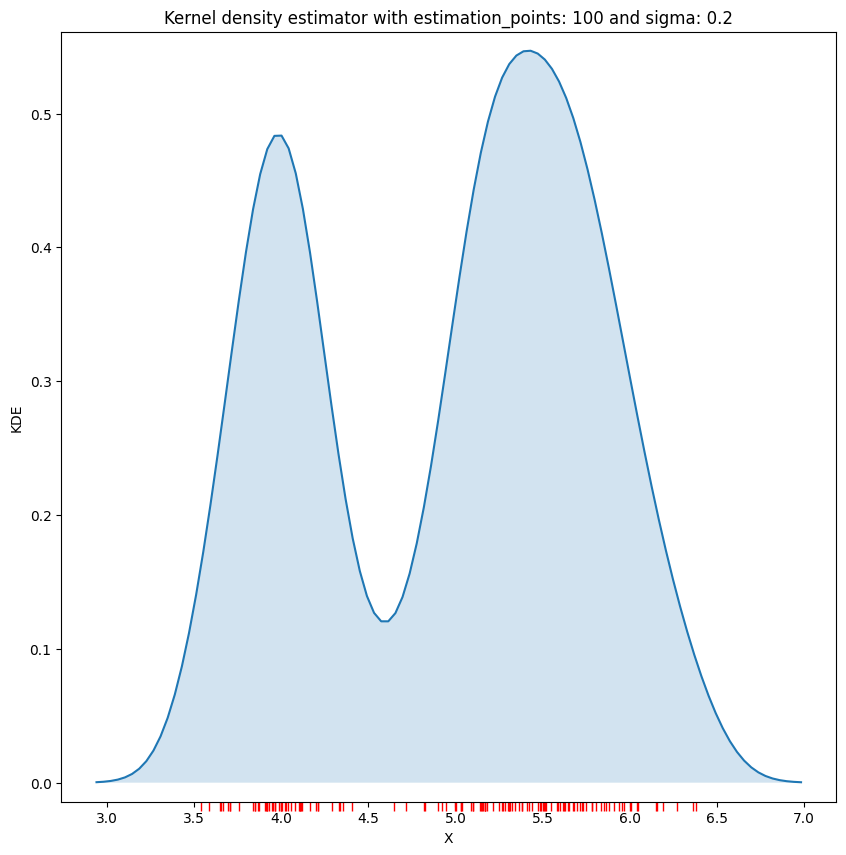

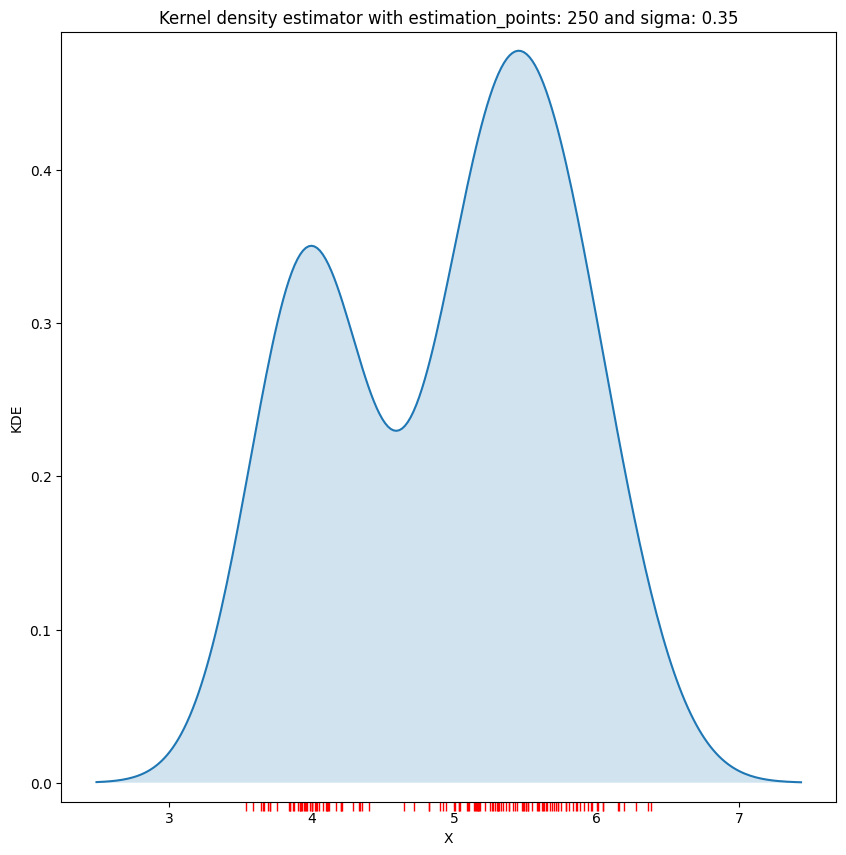

In [6]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

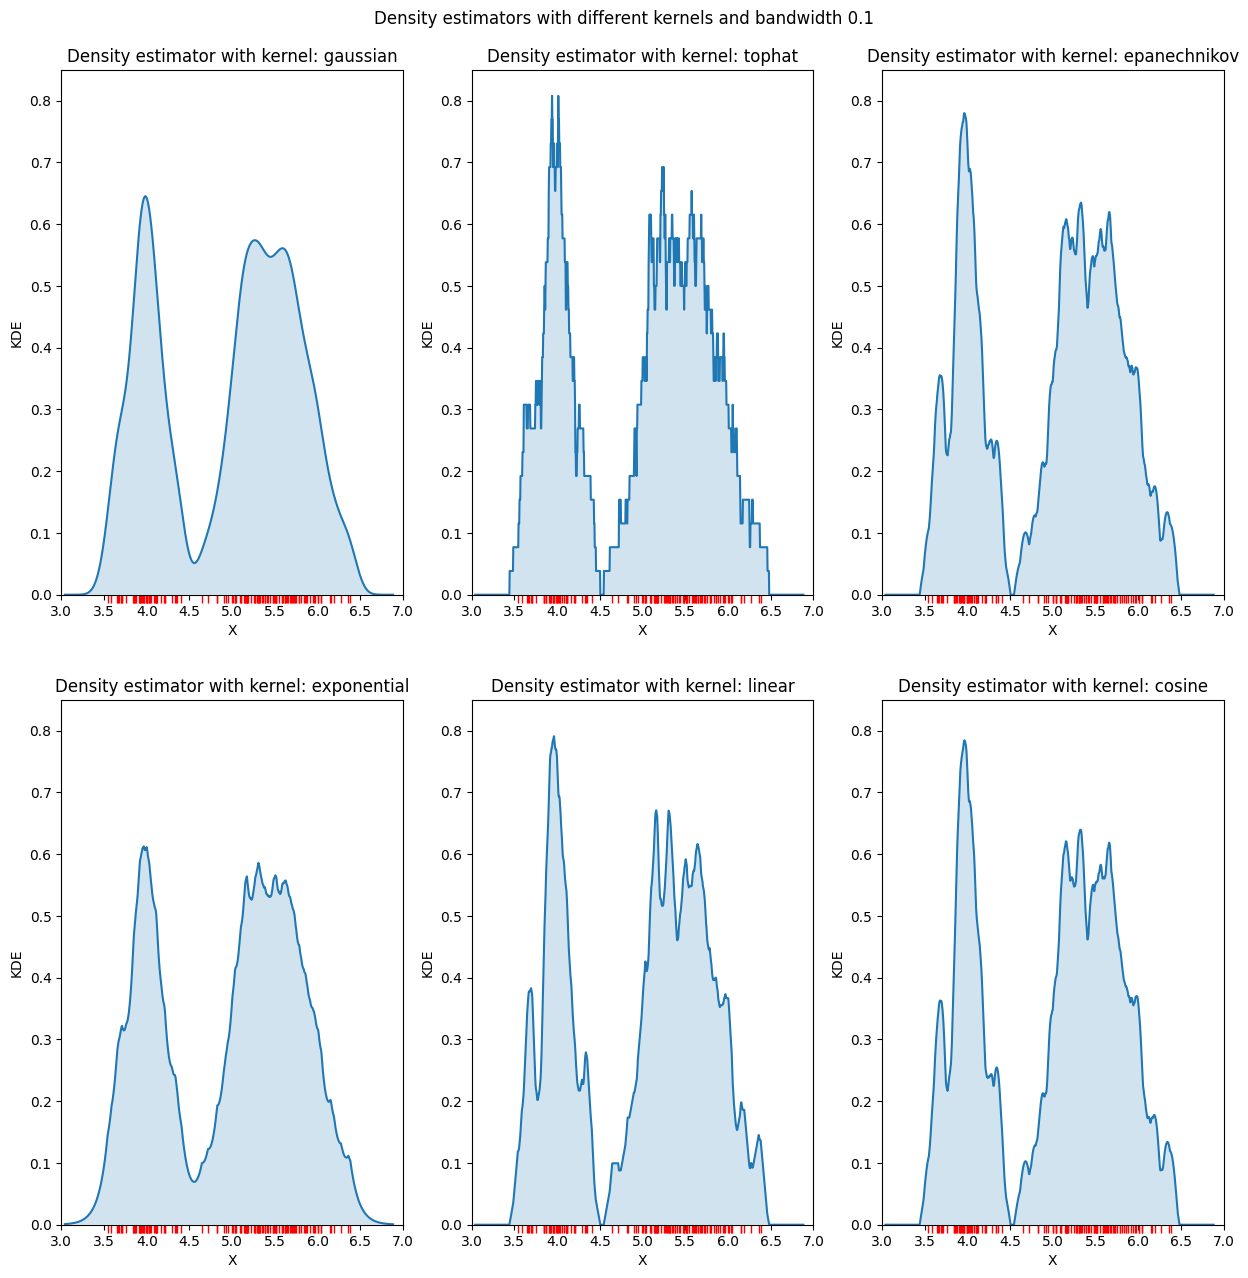

In [7]:
# Figura 1
fig3, ax3 = plt.subplots( figsize = (15,15), nrows = 2, ncols = 3 )

fig3.suptitle("Density estimators with different kernels and bandwidth 0.1", y = 0.92)

kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]

X = np.atleast_2d(np.sort(sample["X"])).T
x_plot = np.linspace(X.min() - .5, X.max() + .5, 1000)[:, np.newaxis]

for i in range(6):
    kde = KernelDensity(bandwidth = 0.1, kernel = kernels[i]).fit(X)
    log_dens = kde.score_samples(x_plot)
    dens = np.exp(log_dens)

    pdf = pd.DataFrame( zip(x_plot[:,0],dens), columns = ["X", "KDE"] )
    sns.lineplot(pdf, x = "X", y = "KDE", ax = ax3[i//3, i%3])
    ax3[i//3, i%3].fill_between(pdf["X"], pdf["KDE"], 0, alpha = 0.2)
    ax3[i//3, i%3].set_title(f"Density estimator with kernel: {kernels[i]}")
    ax3[i//3, i % 3].set_xlim(3, 7)
    ax3[i//3, i % 3].set_ylim(0, 0.85)
    sns.rugplot( x = "X", height=-0.015, clip_on=False, color = "red", data = sample, ax = ax3[i//3, i%3], legend = False)

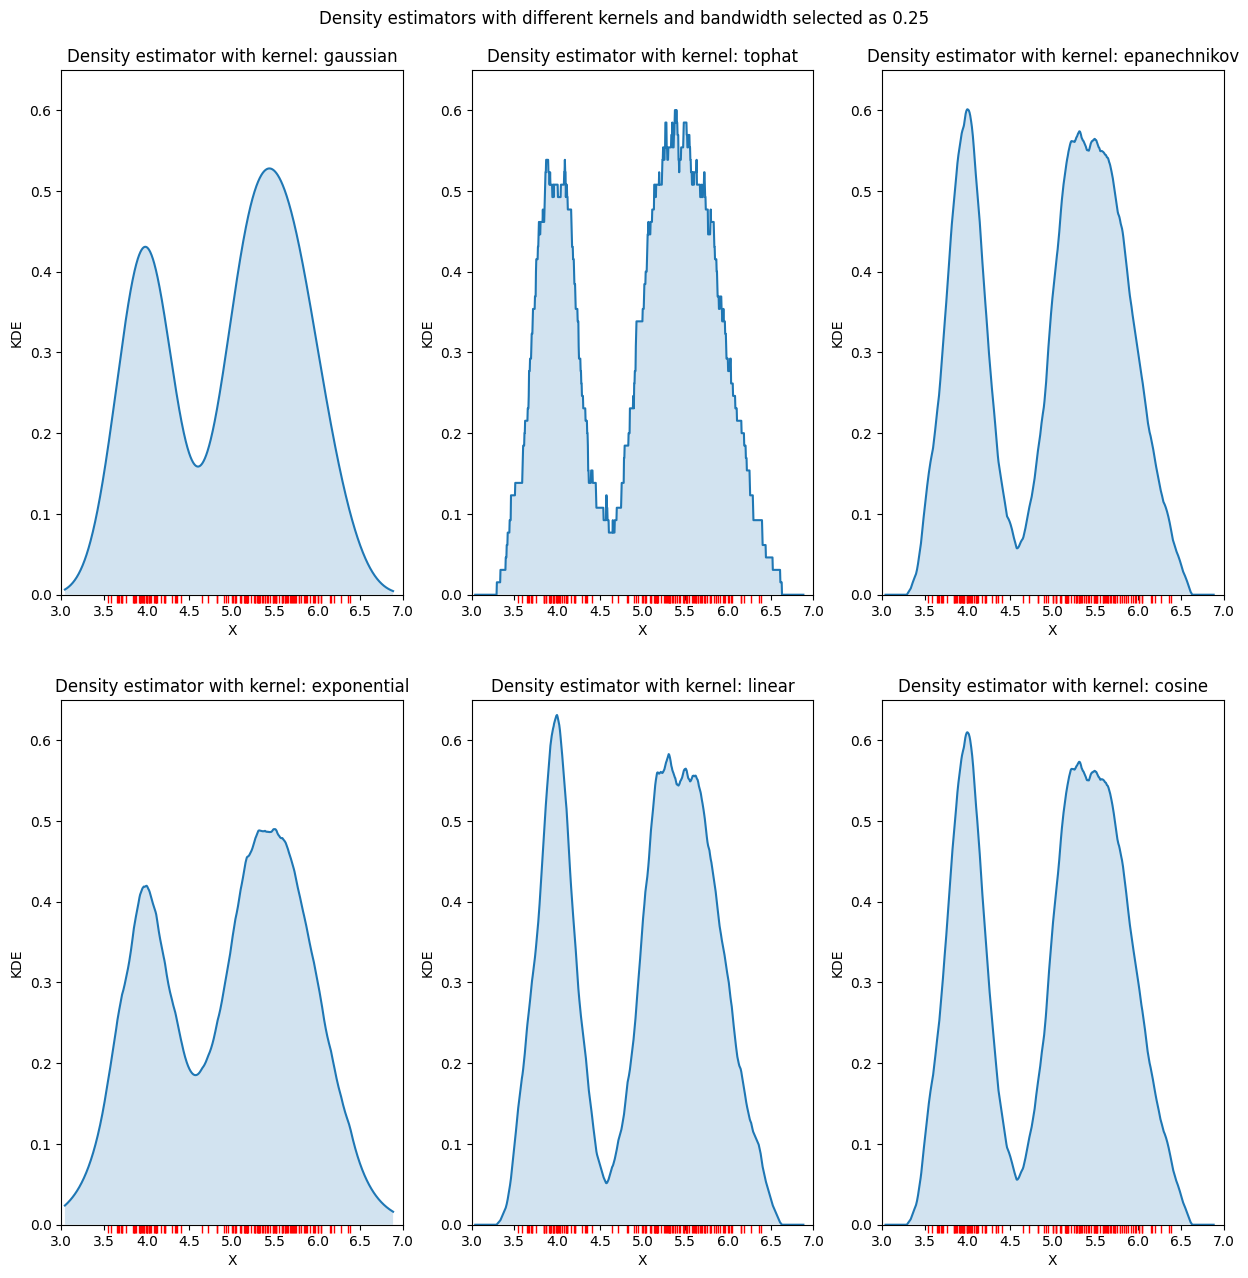

In [8]:
# Figura 2
fig4, ax4 = plt.subplots( figsize = (15,15), nrows = 2, ncols = 3 )
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]

fig4.suptitle("Density estimators with different kernels and bandwidth selected as 0.25", y = 0.92)

X = np.atleast_2d(np.sort(sample["X"])).T
x_plot = np.linspace(X.min() - .5, X.max() + .5, 1000)[:, np.newaxis]

for i in range(6):
    kde = KernelDensity(bandwidth = 0.25, kernel = kernels[i]).fit(X)
    log_dens = kde.score_samples(x_plot)
    dens = np.exp(log_dens)

    pdf = pd.DataFrame( zip(x_plot[:,0],dens), columns = ["X", "KDE"] )
    sns.lineplot(pdf, x = "X", y = "KDE", ax = ax4[i//3, i%3])
    ax4[i//3, i % 3].set_xlim(3, 7)
    ax4[i//3, i % 3].set_ylim(0, 0.65)
    ax4[i//3, i%3].fill_between(pdf["X"], pdf["KDE"], 0, alpha = 0.2)
    ax4[i//3, i%3].set_title(f"Density estimator with kernel: {kernels[i]}")
    sns.rugplot( x = "X", height=-0.015, clip_on=False, color = "red", data = sample, ax = ax4[i//3, i%3], legend = False)

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Metoda 1 - Estymacji funkcjami jądrowymi od podstaw
    
    Plusy:
        - Pełna kontrola nad parametrami oraz łatwa możliwość modyfikacji niektórych elementów
        - Mniej skomplikowana wersja funkcji do wprowadzania danych, lepsza dla osób początkujących
    Minusy:
        - W aktualnej implementacji tylko jedno jądro do wyboru
        - Dobór wielu parametrów w środku funkcji ręcznie co może wpływać na wynik

Metoda 2 - Dedykowane funkcje

    Plusy:
        - Bardzo duża ilość opcji co przy znajomości ich poprawia znacząco wyniki
        - Łatwy w urzyciu i zoptymalizowany, dużo parametrów ma wartości domyślne co ułatwia pracę
    Minusy:
        - Poleganie na ustawieniach zaimplementowanych, bez możliwości zmiany kodu źródłowego
        - Bardzo skomplikowane opcje mogą być niezrozumiałe dla nowych użytkowników, przez co mogą otrzymać złe wyniki

Jak dobór parametrów funkcji wpływa na poprawność i czytelność wyniku:

    1. liczba punktów estamacji:
        - gdy ilość punktów jest za mała to wykres stanie się "kanciasty" i nie będzie oddawał rzeczywistej gładkości rozkładu, co może prowadzić do błędnych interpretacji
        - zbyt duża liczba powoduje zwiększenie kosztu obliczeniowego oraz niepotrzebne wydłużenie generowania wykresu.
        - dobór odpowiedniej ilości powoduje że wykres jest gładki i dobrze reprezentuje naturę estymowanej funkcji
        
    2. Szerokość i położenie granic przedziałów
        - Zbyt wąski zakres powoduje ucięcie np "Ogona" rozkładu oraz ukrycia części danych przez co fałszuje to wyniki
        - Zbyt szeroku zakres powoduje zbyt duże "ściśnięcie" danych w obszarze który nas interesuje i dodanie dużej ilości wartości nie wnoszących nic statystycznie, ponieważ
          otrzymane wartości są bliskie zera
        - Optymalny zakres, delikatnie większy niż minimum i maksimum obserwacji, wtedy dobrze możemy uchwycić zachowanie funkcji, szczególnie na krańcach
        - Gdy położenie granic przedziałów jest dobrane nieprawidłowo wtedy część danych może zostać nieuchwycone i zakrzywia nasze wyniki.
        
    3. Wykorzystana wersja jądra
        - Różne wersje jądra trochę inaczej reprezentują wyniki, np jądro tophat ma wykresy bardziej prostokątne niż gładkie, dodatkowo mogą występować różnice w wysokości czy
          szerokości wierzchołków, co wpływa często na czytelność wykresów, jednak same podstawowe parametry takie jak główne wierzchołki zwykle zostają niezachwiane przy
          odpowiednio dobranej szerokości jądra.
          
    4. Szerokość jądra:
        - gdy szerokość jest za mała to estymator staje się bardzo szpiczasty, odbiega całkowicie, może powodować niewłaściwe wnioski o rozkładzie, trudno również się go odczytuje
        - Zbyt duża szerokość powoduje nadmierne "spłaszczenie" wykresów, zanikają szczyty których może być kilka np w punkcie X = 4 i X = 5.5. Przez to istotne informacje o
          strukturze danych moga zostać ukryte
        - Optymalna szerokość powinna eliminować szum losowy ale jednocześnie wystarczająco szczegółowa aby ujawniać cechy rozkładu, tylko dzięki temu możemy wyciągnąć prawidłowe
          wyniki.

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [9]:
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    X = np.sort(data["X"])
    n = data["X"].shape[0]
    F_d = np.arange(1, n + 1 ) / n
    D1 = sp.stats.kstwo.ppf(1-alpha, n)
    
    F_d_min = F_d - D1
    F_d_min[ F_d_min <= 0 ] = 0

    F_d_max = F_d + D1
    F_d_max[ F_d_max >= 1 ] = 1

    cdf = pd.DataFrame( data = zip(X, F_d, F_d_min, F_d_max), columns = [ "X", "F_d", "F_d_min", "F_d_max" ] )

    fig5, ax5 = plt.subplots( figsize = (10,10), ncols = 1, nrows = 1)
    sns.lineplot(
        data=cdf,
        x="X", y="F_d",
        ax = ax5, 
        color = "red"
    )
    low_plt = sns.lineplot(
        data = cdf,
        x = "X", y = "F_d_min",
        ax = ax5,
        color = "grey"
    )

    high_plt = sns.lineplot(
        data = cdf,
        x = "X", y = "F_d_max",
        ax = ax5,
        color = "grey"
    )

    ax5.fill_between(X, F_d_min, F_d_max, alpha = 0.2, color = "grey")
    ax5.set_title(f"Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={1 - alpha}")
    ax5.set_ylabel("F(x)")
    return cdf


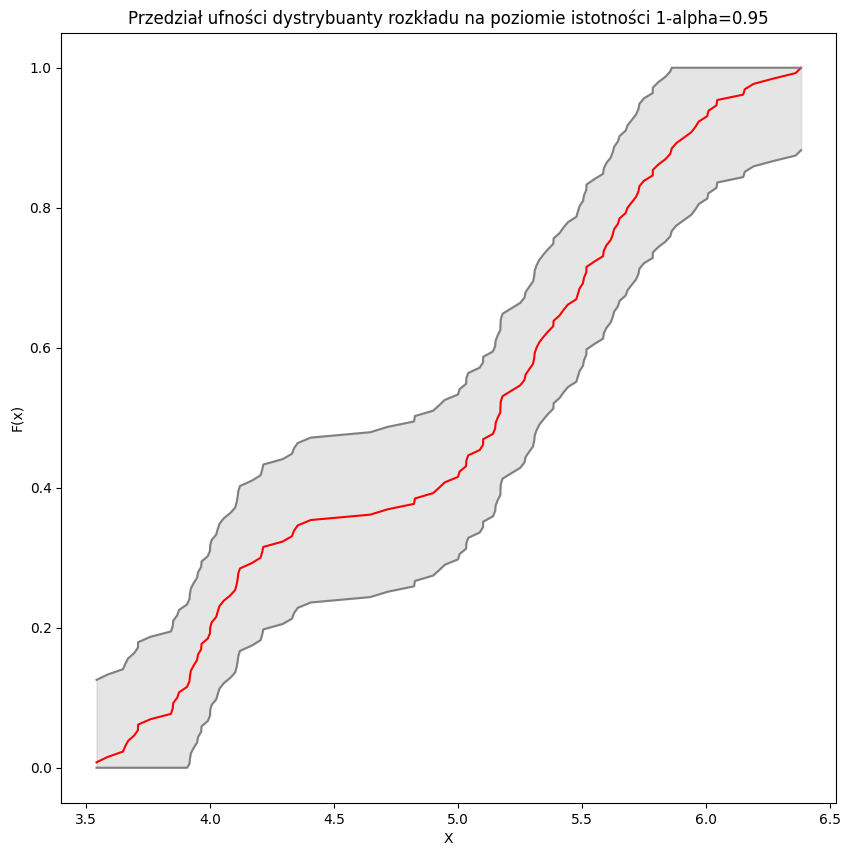

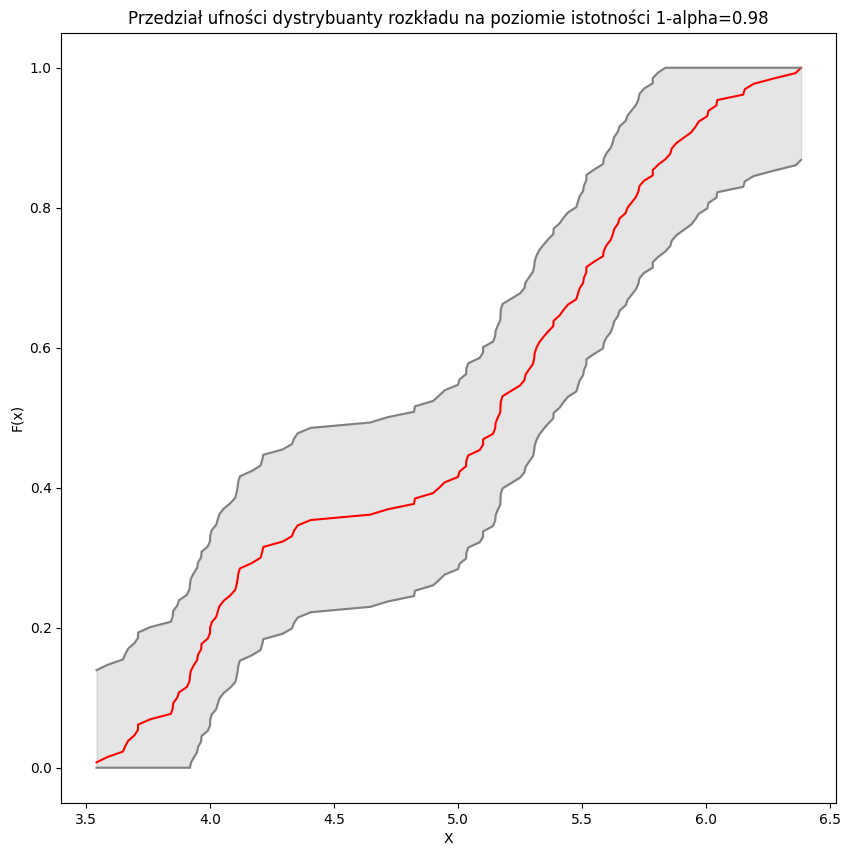

In [10]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))